## Checkpoint 1: Data Cleaning 1

In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                  # Without this line, "plt.show()" is needed at the end of every plotting commands


UsageError: unrecognized arguments: # Without this line, "plt.show()" is needed at the end of every plotting commands


In [4]:
# Load the data in rounds2.csv file to rounds2 dataframe
rounds2 = pd.read_csv("rounds2.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [5]:
# Load the data in companies.csv file to companies dataframe
companies = pd.read_csv("companies.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [6]:
# Chardet: The Universal Character Encoding Detector ; This import is needed to find the encoding of the file.
import chardet

In [7]:
# Identify the coding of the csv files
for filename in ("companies.csv", "rounds2.csv"):
  with open(filename, 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    print(filename, result)                    # Print the encoding of the file

companies.csv {'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}
rounds2.csv {'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [9]:
# Load the data from csv files into dataframe
companies = pd.read_csv("companies.csv", encoding='Windows-1254')
rounds2 = pd.read_csv("rounds2.csv", encoding='Windows-1254')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9e in position 125658: character maps to <undefined>

In [10]:
# After analyzing different encodings, chosen palmos as the right encoding
companies = pd.read_csv("companies.csv", encoding='palmos')
rounds2 = pd.read_csv("rounds2.csv", encoding='palmos')

In [11]:
# Verify the sample data in rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
# Verify the sample data in companies dataframe
companies.sample(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
22654,/Organization/Geologic,geoLOGIC,http://www.geologic.com/,NaN,operating,CAN,AB,Calgary,Calgary,01-01-1983
7470,/Organization/Blinq-4,Blinq,http://blinq.me/,Apps,operating,USA,CA,SF Bay Area,Mountain View,01-01-2013
22949,/Organization/Gimado,Gimado,http://Gimado.com,Music|Search,operating,NaN,NaN,NaN,NaN,NaN


In [13]:
# Change the data to proper case to find unique values in name and permalinks columns of companies dataframe
companies["name"] = companies["name"].str.title()
companies["permalink"] = companies["permalink"].str.lower()

# Remove spaces to find unique values in name and permalinks columns of companies dataframe
companies["name"] = companies["name"].str.strip()
companies["permalink"] = companies["permalink"].str.strip()

companies.sample(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
38708,/organization/nethub-media,Nethub,http://www.nethub.co,Analytics|Business Intelligence|Enterprise Sof...,operating,COL,34,Bogota,BogotÃ¡,30-05-2011
31077,/organization/kong-studios-inc,"Kong Studios, Inc.",NaN,Apps|Games,operating,NaN,NaN,NaN,NaN,01-01-2013
9792,/organization/careerise,Careerise,http://careerise.me,Career Management|Employment|Social Media,operating,EGY,8,Cairo,GÃ®za,01-01-2010


In [14]:
# Change the data to proper case and remove spaces to find unique values in company_permalink column of rounds2 dataframe.
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["name"] = companies["name"].str.strip()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [15]:
# Change the column name of permalink in companies to match the column name in rounds2 dataFrame
companies.rename(columns={"permalink": "company_permalink"}, inplace=True)
companies.sample(3)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
5645,/organization/backchannelmedia,Backchannelmedia,http://www.backchannelmedia.com,News,operating,USA,MA,Boston,Boston,01-03-2000
61030,/organization/validately,Validately,https://validately.com/,Internet,operating,USA,NY,New York City,New York,01-01-2013
48184,/organization/reventive,Reventive,http://reventive-world.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,11-08-2011


In [16]:
#Details of companies
print("companies shape", companies.shape, sep=" : ", end = "\n\n")

print("companies name details", companies["name"].describe(), sep=" : \n", end = "\n\n")

print("companies permalink details", companies["company_permalink"].describe(), sep=" : \n")

companies shape : (66368, 10)

companies name details : 
count     66367
unique    66034
top       Shift
freq          4
Name: name, dtype: object

companies permalink details : 
count                      66368
unique                     66368
top       /organization/imageids
freq                           1
Name: company_permalink, dtype: object


In [17]:
# print the duplicates in name column of companies dataframe

company_names = companies["name"]
companies[company_names.isin(company_names[company_names.duplicated()])]

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/organization/3divaz-2,3Divaz,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/organization/3divaz-3,3Divaz,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
1526,/organization/adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/organization/adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/organization/agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
...,...,...,...,...,...,...,...,...,...,...
65799,/organization/zenpayroll,Gusto,https://gusto.com/,Financial Services|Personal Finance|Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2011
65897,/organization/zesty,Zesty,http://www.zesty.co.uk,Curated Web|Health Care|Healthcare Services|On...,operating,GBR,H9,London,London,01-05-2013
65899,/organization/zestyapp,Zesty,http://www.zesty.com/,Health and Wellness|Logistics|Organic Food|Spe...,operating,USA,CA,SF Bay Area,San Francisco,04-11-2013
66028,/organization/zingbox,Zingbox,http://www.zingbox.com/,Leisure|Music|Music Services,operating,USA,CA,SF Bay Area,Mountain View,NaN


In [18]:
# Number of companies with closed status in companies dataframe
companies[companies['status'].str.lower() == 'closed'].shape

(6238, 10)

In [19]:
# shape of rounds2 dataframe
rounds2.shape

(114949, 6)

In [92]:
# Merge rounds2 and companies dataframes using company_permalink column
master_frame = pd.merge(rounds2, companies, how="inner", on="company_permalink")
master_frame.sample(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
111674,/organization/wp-engine,/funding-round/7157d087b258c1df2fab039b2c6ed474,venture,B,14-01-2014,"15,000,000",Wp Engine,http://wpengine.com,Blogging Platforms|Software|Web CMS|Web Hosting,operating,USA,TX,Austin,Austin,01-03-2010
59021,/organization/mappedin,/funding-round/1399908fa54e639490ee5dec217e5b4b,seed,NaN,01-07-2012,"1,510,000",Mappedin,http://www.mappedin.com/,Analytics|Big Data|Enterprise Software|Indoor ...,operating,CAN,ON,Toronto,Kitchener,02-03-2011
86139,/organization/sbs-resources,/funding-round/63eac7ba0cc5e6dfc63f8ad9ce123231,equity_crowdfunding,NaN,08-10-2014,nan,Sbs Resources,NaN,Manufacturing,operating,USA,NY,New York City,Goshen,03-03-2014


In [93]:
# Get info on master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [94]:
# Unique companies in rounds2 dataframe. This is equal to the unique company names in 
# master_frame as there are same number of records in rounds2 and master_frame.

master_frame["name"].nunique()

66034

## Checkpoint 2: Funding Type Analysis

In [95]:
master_frame.shape

(114949, 15)

In [96]:
# Check the null values in master_frame
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [97]:
# Remove the row from master_frame where name is null
master_frame = master_frame[~master_frame['name'].isna()]
master_frame.shape

(114948, 15)

In [98]:
# Explain raised_amount_usd column in master_frame
master_frame['raised_amount_usd'].describe()

count           94,958
mean        10,426,979
std        114,821,848
min                  0
25%            322,604
50%          1,680,521
75%          7,000,000
max     21,271,935,000
Name: raised_amount_usd, dtype: float64

In [99]:
# Get the count of funding_round_type where raised_amount_usd is null
master_frame[master_frame['raised_amount_usd'].isna()]\
.groupby("funding_round_type")['company_permalink'].count()

funding_round_type
angel                    1234
convertible_note          370
debt_financing            213
equity_crowdfunding      2029
grant                      76
non_equity_assistance     118
post_ipo_equity            10
private_equity            349
product_crowdfunding       24
secondary_market           65
seed                     6921
undisclosed              3315
venture                  5266
Name: company_permalink, dtype: int64

In [100]:
# Get the count of funding_round_type where raised_amount_usd is not null
master_frame[~master_frame['raised_amount_usd'].isna()]\
.groupby("funding_round_type")['company_permalink'].count()

funding_round_type
angel                     4860
convertible_note          1447
debt_financing            6682
equity_crowdfunding       1228
grant                     2124
non_equity_assistance       73
post_ipo_debt              152
post_ipo_equity            628
private_equity            1936
product_crowdfunding       386
secondary_market            30
seed                     23602
undisclosed               1582
venture                  50228
Name: company_permalink, dtype: int64

In [101]:
master_frame = master_frame[~master_frame['raised_amount_usd'].isna()]
master_frame.shape

(94958, 15)

In [102]:
# Explain funding_round_type column in master_frame
master_frame['funding_round_type'].describe()

count       94958
unique         14
top       venture
freq        50228
Name: funding_round_type, dtype: object

In [103]:
# Get unique valuues of funding_round_type column in a sorted fashion
np.sort(master_frame['funding_round_type'].unique())

array(['angel', 'convertible_note', 'debt_financing',
       'equity_crowdfunding', 'grant', 'non_equity_assistance',
       'post_ipo_debt', 'post_ipo_equity', 'private_equity',
       'product_crowdfunding', 'secondary_market', 'seed', 'undisclosed',
       'venture'], dtype=object)

In [104]:
# Verify whether there is any null data in funding_round_type column
master_frame['funding_round_type'].isnull().sum()

0

In [105]:
# Get the raised_amount_usd across each funding_round_type
master_frame.groupby("funding_round_type")["raised_amount_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,"4,860","958,694","7,404,397",0,"150,000","400,000","1,000,000","494,511,992"
convertible_note,"1,447","1,453,439","8,043,846",0,"78,848","272,000","1,000,000","185,048,285"
debt_financing,"6,682","17,043,526","280,320,357",0,"330,484","1,100,000","4,000,000","21,271,935,000"
equity_crowdfunding,"1,228","538,368","1,719,329",0,"7,000","100,000","395,901","27,400,000"
grant,"2,124","4,300,576","25,587,424",0,"50,000","201,684","1,700,000","750,000,000"
non_equity_assistance,73,"411,203","1,771,747",0,"25,000","60,000","125,000","15,000,000"
post_ipo_debt,152,"168,704,572","602,473,804","70,000","4,000,000","19,950,000","60,000,000","5,800,000,000"
post_ipo_equity,628,"82,182,494","469,188,916",77,"3,764,794","12,262,852","40,000,000","10,664,943,639"
private_equity,"1,936","73,308,593","198,113,458",0,"5,000,000","20,000,000","75,000,000","4,745,460,219"


In [106]:
# Change the format of values so that they display with commas and not in exponential format
pd.options.display.float_format = '{:,.0f}'.format

# Display the master_frame grouped by funding_round_type sorted by median.
master_frame.groupby("funding_round_type")["raised_amount_usd"].describe().sort_values(by="50%")


,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
non_equity_assistance,73,"411,203","1,771,747",0,"25,000","60,000","125,000","15,000,000"
equity_crowdfunding,"1,228","538,368","1,719,329",0,"7,000","100,000","395,901","27,400,000"
product_crowdfunding,386,"1,363,131","4,698,380",0,"40,242","183,915","735,000","52,000,000"
grant,"2,124","4,300,576","25,587,424",0,"50,000","201,684","1,700,000","750,000,000"
convertible_note,"1,447","1,453,439","8,043,846",0,"78,848","272,000","1,000,000","185,048,285"
seed,"23,602","719,847","2,221,775",0,"55,000","275,000","1,000,000","200,000,000"
angel,"4,860","958,694","7,404,397",0,"150,000","400,000","1,000,000","494,511,992"
undisclosed,"1,582","19,242,370","199,323,809",0,"220,000","1,018,680","4,848,804","5,000,000,000"
debt_financing,"6,682","17,043,526","280,320,357",0,"330,484","1,100,000","4,000,000","21,271,935,000"


In [107]:
master_frame.shape

(94958, 15)

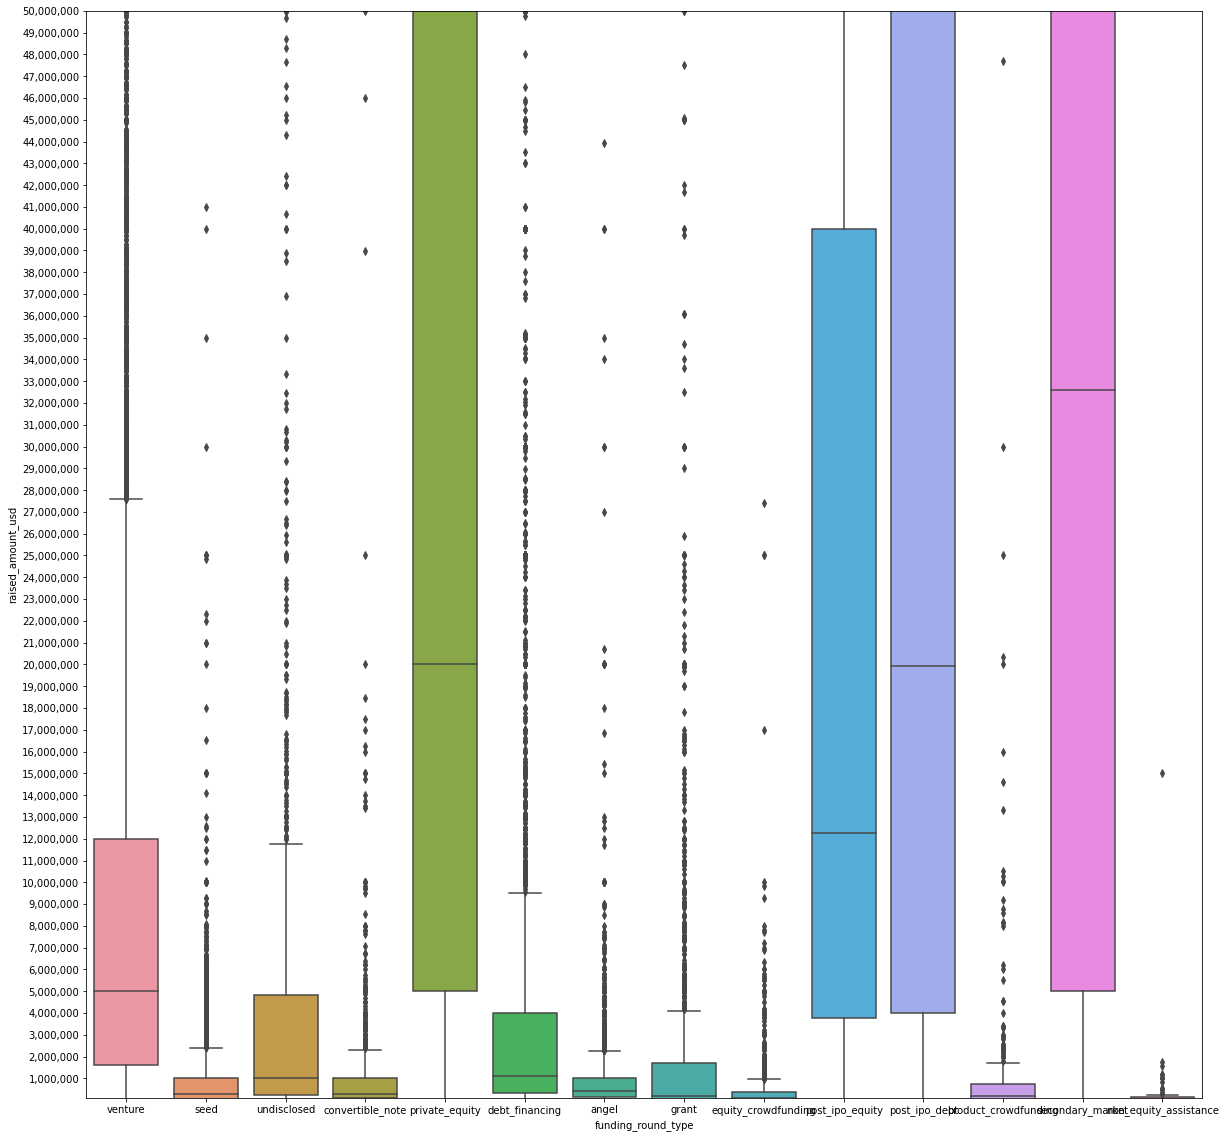

In [145]:
import matplotlib.ticker as ticker
plt.figure(figsize=(20, 20))

a = sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = master_frame)
a.set(ylim = (100000,50000000))
a.yaxis.set_major_locator(ticker.MultipleLocator(1000000))
a.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

In [129]:
master_frame['raised_amount_usd'].describe()

count           94,958
mean        10,426,979
std        114,821,848
min                  0
25%            322,604
50%          1,680,521
75%          7,000,000
max     21,271,935,000
Name: raised_amount_usd, dtype: float64

In [108]:
master_frame[(master_frame["raised_amount_usd"]>=5_000_000) &(master_frame["raised_amount_usd"]<=15_000_000)].shape

(18848, 15)

In [37]:
master_frame = master_frame[(master_frame["raised_amount_usd"]>=5_000_000) &\
             (master_frame["raised_amount_usd"]<=15_000_000)]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000",#Fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
21,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,"6,000,000","1-800-Publicrelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000",1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
46,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,"6,602,694",Zenchef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114921,/organization/zyomyx-inc,/funding-round/85443f5438bfd50104b9591eabc95c94,grant,NaN,26-03-2014,"7,500,000",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,"14,219,999",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114930,/organization/zyraz-technology,/funding-round/c05aab2155e390066d51c6852ff61464,grant,NaN,11-09-2009,"5,400,000",Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,"7,991,547",Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994


In [39]:
# Create a dataframe where raised_amount_usd is between 5-15M and sort by count descending

master_frame[(master_frame["raised_amount_usd"]>=5_000_000) &\
             (master_frame["raised_amount_usd"]<=15_000_000)].groupby("funding_round_type")\
["raised_amount_usd"].describe().sort_values(by="count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
venture,"16,598","8,888,551","3,060,399","5,000,000","6,000,000","8,269,594","11,000,000","15,000,000"
debt_financing,870,"8,283,572","3,072,382","5,000,000","5,604,250","7,500,000","10,000,000","15,000,000"
private_equity,429,"9,283,496","3,140,014","5,000,000","6,250,000","9,469,746","11,999,997","15,000,000"
undisclosed,226,"8,499,421","2,926,151","5,000,000","6,000,000","8,000,000","10,000,000","15,000,000"
seed,203,"6,610,420","2,107,430","5,000,000","5,000,000","6,000,000","7,050,000","15,000,000"
grant,173,"8,546,105","2,769,451","5,000,000","6,000,000","8,100,000","10,000,000","15,000,000"
post_ipo_equity,152,"9,324,945","2,850,843","5,000,000","6,710,274","9,276,438","11,700,000","15,000,000"
angel,72,"7,212,355","2,421,091","5,000,000","5,015,000","6,500,000","8,908,096","15,000,000"
convertible_note,48,"8,071,730","3,298,569","5,000,000","5,190,780","6,925,436","9,886,568","15,000,000"


<AxesSubplot:xlabel='count', ylabel='funding_round_type'>

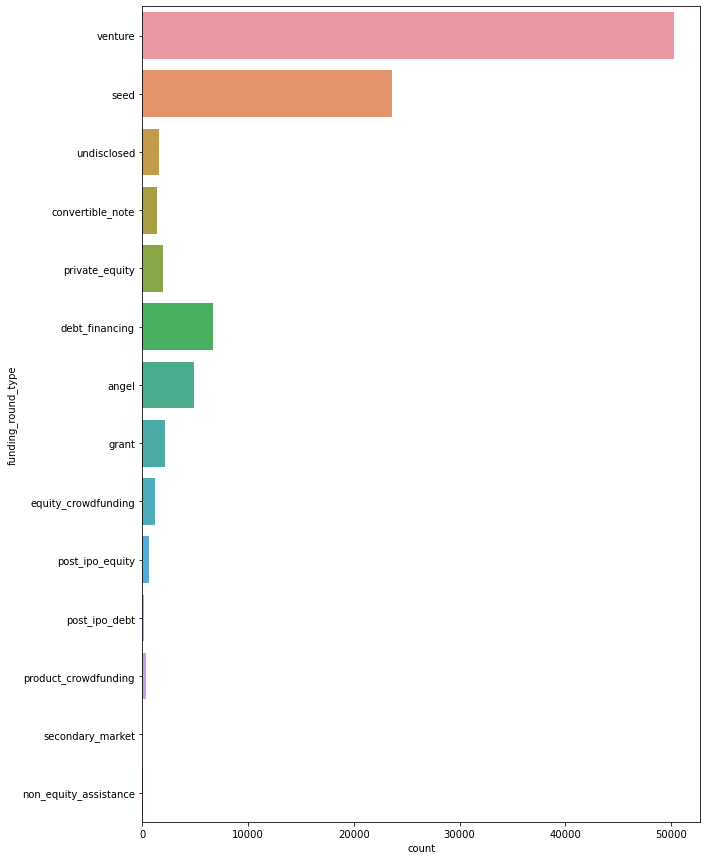

In [142]:
plt.figure(figsize=(10, 15))
sns.countplot(data = master_frame, y ="funding_round_type" )

In [40]:
# Create a dataframe filtered for only 'venture' funding_round_types
venture_frame = master_frame[master_frame["funding_round_type"] == "venture"]
venture_frame.sample(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
5542,/organization/amw-gmbh,/funding-round/dac58d7eece87ded12699e9ee090bfc5,venture,B,01-09-2014,"9,192,383",Amw Gmbh,http://www.a-m-w.eu/,Pharmaceuticals,operating,NaN,NaN,NaN,NaN,NaN
75405,/organization/piczo,/funding-round/d178b58e3361b8b60b0959648e224b73,venture,C,01-01-2007,"11,000,000",Piczo,http://www.piczo.com,Social Media|Social Network Media|Teenagers,acquired,USA,CA,SF Bay Area,San Francisco,01-11-1990
67121,/organization/neuromod-devices,/funding-round/781f97d3d19d46c7be1c83dbac39186a,venture,A,29-09-2015,"6,167,613",Neuromod Devices,http://neuromoddevices.com,Health and Wellness|Medical Devices|Technology,operating,IRL,7,Dublin,Dublin,01-01-2010


In [41]:
# Get info about venture frame

venture_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 114936
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        16598 non-null  object 
 1   funding_round_permalink  16598 non-null  object 
 2   funding_round_type       16598 non-null  object 
 3   funding_round_code       11690 non-null  object 
 4   funded_at                16598 non-null  object 
 5   raised_amount_usd        16598 non-null  float64
 6   name                     16598 non-null  object 
 7   homepage_url             15706 non-null  object 
 8   category_list            16399 non-null  object 
 9   status                   16598 non-null  object 
 10  country_code             15895 non-null  object 
 11  state_code               15656 non-null  object 
 12  region                   15711 non-null  object 
 13  city                     15711 non-null  object 
 14  founded_at           

## Checkpoint 3: Country Analysis

In [42]:
# Get the null values info in each column of venture_frame
venture_frame.isna().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         4908
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                892
category_list               199
status                        0
country_code                703
state_code                  942
region                      887
city                        887
founded_at                 2914
dtype: int64

In [43]:
# Get the country_code frequency in venture_frame
venture_frame['country_code'].value_counts()

USA    12150
GBR      628
CHN      533
CAN      426
IND      330
       ...  
BMU        1
BGR        1
BGD        1
MNE        1
MLT        1
Name: country_code, Length: 74, dtype: int64

In [44]:
# Get the normalized country_code frequency in venture_frame
venture_frame['country_code'].value_counts(normalize=True)*100

USA   76
GBR    4
CHN    3
CAN    3
IND    2
      ..
BMU    0
BGR    0
BGD    0
MNE    0
MLT    0
Name: country_code, Length: 74, dtype: float64

In [45]:
# Check the data where country_code is null in venture_frame
venture_frame[venture_frame['country_code'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
100,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,"5,400,000",123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997
133,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,"10,000,000",17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015
145,/organization/1800diapers,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,"7,000,000",1800Diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN
386,/organization/360quan,/funding-round/67f5b12f4676395df03f32378bcfebae,venture,B,05-12-2007,"10,000,000",360Quan,http://www.360quan.com,Internet|Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,28-03-2006
387,/organization/360quan,/funding-round/97d556581f9645328053142de8fa394d,venture,C,01-07-2008,"8,000,000",360Quan,http://www.360quan.com,Internet|Social Media|Social Network Media,operating,NaN,NaN,NaN,NaN,28-03-2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114183,/organization/ziebel,/funding-round/62457b9c6bc25a34429846e4b0ecf141,venture,NaN,20-01-2014,"10,000,000",Ziebel,http://ziebel.com,Clean Technology,operating,NaN,NaN,NaN,NaN,NaN
114262,/organization/zimi,/funding-round/125587c8143c3ce039b19ccf6718b0b5,venture,B,18-03-2015,"15,000,000",Zimi,http://www.zmifi.com/,Mobile|Mobile Devices|Online Shopping,closed,NaN,NaN,NaN,NaN,NaN
114266,/organization/zimory,/funding-round/4692f2285983a12f823f05aaeb46d986,venture,NaN,04-10-2010,"5,482,000",Zimory,http://www.zimory.com,Enterprise Software,operating,NaN,NaN,NaN,NaN,01-01-2007
114450,/organization/zkey-com,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,"10,000,000",Zkey.Com,http://zkey.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN


In [46]:
# Check the data of state_code, region and city when country_code is null
venture_frame[venture_frame['country_code'].isna()][['state_code','region','city']].describe()

,state_code,region,city
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN


In [47]:
# Remove the countries where country code is null
venture_frame = venture_frame[~venture_frame['country_code'].isna()]
venture_frame.shape

(15895, 15)

In [48]:
# Create a dataframe to get top 9 countries  sorted by sum of raised_amount_usd
venture_frame_grpd = venture_frame.groupby('country_code').agg({'raised_amount_usd': ['sum','count']})  # group the venture_frame by countries 
venture_frame_grpd.columns = venture_frame_grpd.columns.droplevel(0)             # drop the top level column
venture_frame_grpd.reset_index(inplace=True)                                         # reset the index so that countries become a column rather than index
venture_frame_grpd = venture_frame_grpd.sort_values(by="sum", ascending=False).head(9)   # get the top 9 countries
venture_frame_grpd


,country_code,sum,count
71,USA,"108,531,347,515",12150
25,GBR,"5,436,843,539",628
14,CHN,"5,016,561,053",533
11,CAN,"3,647,009,578",426
31,IND,"2,976,543,602",330
34,ISR,"2,840,305,951",323
24,FRA,"2,112,425,453",251
18,DEU,"1,765,026,223",203
64,SWE,"655,040,681",77


[(0.0, 6000000000.0)]

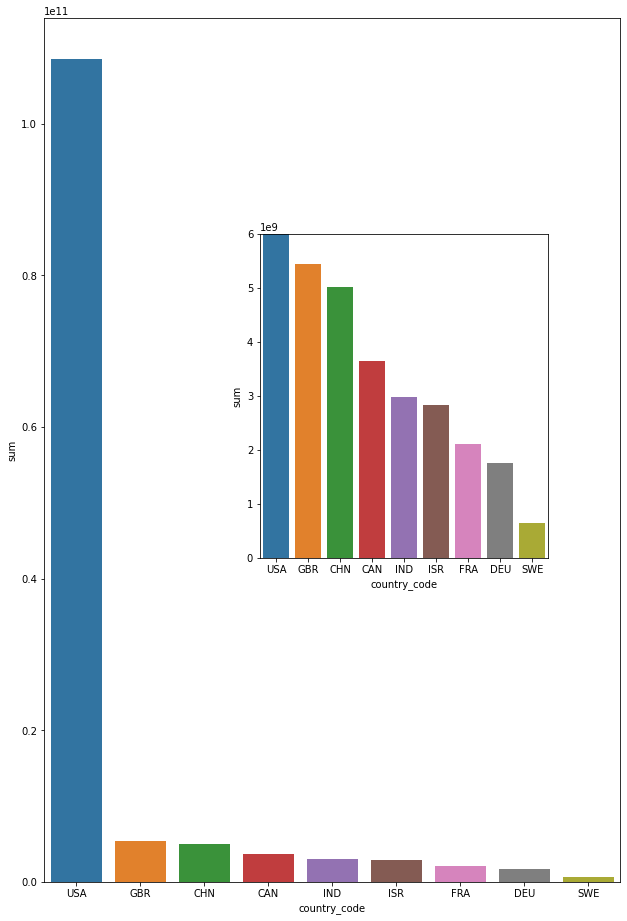

In [158]:
fig = plt.figure(figsize=(10, 15))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.4, 0.4, 0.4, 0.3]) # inset axes

sns.barplot(data = venture_frame_grpd, x ="country_code", y="sum", ax = axes1 )

a = sns.barplot(data = venture_frame_grpd, x ="country_code", y="sum", ax = axes2 )
a.set(ylim = (0,6000000000))




In [49]:
# Read wikipedia to get the countries that have English as official language
from urllib import request
import ssl

url="https://example.com/data.html"
context = ssl._create_unverified_context()
url = "https://www.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language#Sovereign_states"
response = request.urlopen(url, context=context)
html = response.read()

wiki_data = pd.read_html(html)

# Read the data from different dataframes obtained after reading from wikipedia
english_countries_wiki = pd.concat([wiki_data[0],wiki_data[1],wiki_data[2]])
english_countries_wiki.reset_index(inplace=True)

In [50]:
# Filter the countries in the dataframe based on the data from wikipedia and get the top 3 countries
top_en_countries = venture_frame_grpd[venture_frame_grpd['country_code'].apply(lambda x : x.strip()  in english_countries_wiki['Alpha-3 code'].values)].head(3)
top_en_countries


,country_code,sum,count
71,USA,"108,531,347,515",12150
25,GBR,"5,436,843,539",628
11,CAN,"3,647,009,578",426


In [51]:
# properly rank the top 3 coutries by resetting the index
top_en_countries.reset_index(drop=True, inplace=True)
top_en_countries

,country_code,sum,count
0,USA,"108,531,347,515",12150
1,GBR,"5,436,843,539",628
2,CAN,"3,647,009,578",426


In [52]:
# Filter the venture countries with top 3 english speaking couties and create a new data frame
top_en_venture_countries = venture_frame[venture_frame['country_code'] \
                                         .apply(lambda x : x in top_en_countries['country_code'].values)]
top_en_venture_countries

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000",1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,"11,999,347",128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014
110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,"15,000,000",1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007
111,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,"5,000,000",1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114914,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,"5,026,000",Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007
114916,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,"8,400,000",Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,"12,000,000",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,"14,219,999",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998


In [53]:
# Verify the countries in the final list
top_en_venture_countries['country_code'].value_counts()

USA    12150
GBR      628
CAN      426
Name: country_code, dtype: int64

## Checkpoint 4: Sector Analysis 1

In [54]:
# Get the shape of top_en_venture_countries dataframe
top_en_venture_countries.shape

(13204, 15)

In [55]:
# Show the sum of null values in each column in the dataframe
top_en_venture_countries.isna().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         3873
funded_at                     0
raised_amount_usd             0
name                          0
homepage_url                645
category_list                97
status                        0
country_code                  0
state_code                   22
region                       44
city                         44
founded_at                 1946
dtype: int64

In [56]:
# Check the null data in category_list of top_en_venture_countries dataframe
top_en_venture_countries[top_en_venture_countries["category_list"].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1430,/organization/accelerator-corp,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,NaN,22-05-2003,"15,000,000",Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
1432,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,"11,800,000",Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
2217,/organization/adaptive-media-3,/funding-round/62fe3848f9a2f28888cac0889f18f38f,venture,NaN,13-10-1999,"15,000,000",Adaptive Media,http://www.adaptivemedia.com/,NaN,operating,USA,CA,SF Bay Area,Sunnyvale,01-01-1999
4785,/organization/alphaserv-com,/funding-round/9a938f76a7d7213cda4e65e0554c0b8b,venture,NaN,24-11-1999,"5,000,000",Alphaserv.Com,http://www.alphaserv.com/,NaN,closed,USA,CA,"Orange County, California",Santa Ana,NaN
4858,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,"7,100,000",Altela,http://altelainc.com/,NaN,operating,USA,NM,Albuquerque,Albuquerque,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109538,/organization/wdt-acquisition,/funding-round/8de05acb42188bb76c517afcd95320b2,venture,NaN,12-10-2010,"6,287,079",Wdt Acquisition,NaN,NaN,operating,USA,TX,Dallas,Addison,01-01-2006
110229,/organization/westwave-communications,/funding-round/a25964cc9990ad746fc966a6a3f652f0,venture,B,24-11-1999,"6,000,000",Westwave Communications,http://www.westwave.com,NaN,closed,USA,CA,Napa Valley,Santa Rosa,01-01-1998
110371,/organization/whensoon,/funding-round/d6d7145dd4917e0cbcef51d320d2a455,venture,NaN,22-07-2011,"5,000,000",Whensoon,NaN,NaN,operating,USA,CA,SF Bay Area,San Francisco,01-01-2011
112403,/organization/xshares-group-llc,/funding-round/078473e9b20f414cf1a4ffada366eb83,venture,NaN,02-02-2007,"10,000,000",Xshares Group Llc,http://www.xsharesadvisors.com,NaN,operating,USA,NY,New York City,New York,NaN


In [57]:
# Remove the rows having null values in category_list of top_en_venture_countries dataframe
top_en_venture_countries = top_en_venture_countries[~top_en_venture_countries["category_list"].isna()]
top_en_venture_countries.shape

(13107, 15)

In [58]:
top_en_venture_countries["category_list"].value_counts()

Biotechnology                                                                     1245
Software                                                                          1093
Enterprise Software                                                                435
Health Care                                                                        389
Clean Technology                                                                   345
                                                                                  ... 
Analytics|Big Data|Business Intelligence|Software|Web Development                    1
Business Productivity|Data Visualization|Mobile|Productivity Software|Software       1
Security|VoIP                                                                        1
Health and Wellness|K-12 Education                                                   1
Content|News                                                                         1
Name: category_list, Length: 3964, dtype: i

In [59]:
top_en_venture_countries["category_list"].nunique()

3964

In [61]:

top_en_venture_countries = top_en_venture_countries.assign(primary_category=lambda x : x['category_list'])
top_en_venture_countries["primary_category"] = top_en_venture_countries["primary_category"].apply(lambda x : x.split("|")[0].strip().lower())
top_en_venture_countries

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000",1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps
103,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,"11,999,347",128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,service providers
110,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,"15,000,000",1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing
111,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,"5,000,000",1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114914,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,"5,026,000",Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,facebook applications
114916,/organization/zynstra,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,"8,400,000",Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,software
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,"12,000,000",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,biotechnology
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,"14,219,999",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,biotechnology


In [62]:
print("Unique Values", top_en_venture_countries["primary_category"].nunique())
print("Null Values", top_en_venture_countries["primary_category"].isna().sum())
top_en_venture_countries["primary_category"].value_counts()

Unique Values 436
Null Values 0


biotechnology              1595
software                   1147
advertising                 733
enterprise software         682
analytics                   541
                           ... 
hospitals                     1
utilities                     1
farming                       1
social + mobile + local       1
senior citizens               1
Name: primary_category, Length: 436, dtype: int64

In [63]:
# Read the mapping file and show few sample data records in that dataframe
mapping = pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [64]:
# Get the shape of mapping file
mapping.shape

(688, 10)

In [65]:
# Remove rows with null values in category_list
mapping = mapping[~mapping["category_list"].isna()]
mapping.shape

(687, 10)

In [66]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [67]:
# convert the mapping dataframe from wide format to long format

value_vars = list(mapping.columns[1:])         # store the value variables in one Series

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

mapping_long_df = pd.melt(mapping, id_vars = id_vars, value_vars = value_vars)
mapping_long_df = mapping_long_df[mapping_long_df["value"] == 1].drop("value",axis=1)
mapping_long_df

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [68]:
# rename columns in modified mapping dataframe
mapping_long_df.rename(columns={"category_list": "primary_category", "variable": "sector"}, inplace=True)

# Get different sectors in mapping
mapping_long_df["sector"].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: sector, dtype: int64

In [69]:
# Show different categories in mapping
mapping_long_df["primary_category"].value_counts()

Delivery                    1
Gps                         1
High Tech                   1
Unmanned Air Systems        1
Biomass Power Generation    1
                           ..
Cloud Computing             1
Parking                     1
Cloud Ma0gement             1
Perso0l Branding            1
Furniture                   1
Name: primary_category, Length: 687, dtype: int64

In [70]:
# Replace '0' with 'na', strip the additional spaces and change the categories to lower case
mapping_long_df["primary_category"] = mapping_long_df["primary_category"].apply(lambda x : x.replace("0","na").lower().strip())

In [71]:
mapping_long_df["primary_category"].unique()

array(['adventure travel', 'aerospace', 'auto', 'automated kiosk',
       'automotive', 'bicycles', 'boating industry', 'cad', 'cars',
       'design', 'designers', 'drones', 'electric vehicles', 'fuels',
       'heavy industry', 'industrial automation', 'limousines', 'soccer',
       'sporting goods', 'sports', 'transportation',
       'unmanned air systems', 'air pollution control', 'aquaculture',
       'bio-pharm', 'biofuels', 'bioinformatics',
       'biomass power generation', 'biometrics', 'biotechnology',
       'bitcoin', 'carbon', 'chemicals', 'clean energy',
       'clean technology', 'clean technology it', 'commercial solar',
       'commodities', 'concentrated solar power', 'disruptive models',
       'early-stage technology', 'energy', 'energy efficiency',
       'energy it', 'energy management', 'energy storage',
       'environmental innovation', 'fertility', 'fuel cells',
       'funeral industry', 'gas', 'green', 'green consumer goods',
       'home & garden', 'home a

In [72]:
# Merge rounds2 and companies dataframes using company_permalink column
top_en_ven_cnt_with_sectors = pd.merge(top_en_venture_countries, mapping_long_df, how="inner", on="primary_category")
top_en_ven_cnt_with_sectors.sample(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,sector
3586,/organization/everist-genomics,/funding-round/b01a20d2164908935024f2bd1fe8229b,venture,NaN,03-02-2012,"9,479,766",Everist Health,http://everisthealth.com,Biotechnology|Health Diagnostics,operating,USA,MI,Detroit,Ann Arbor,NaN,biotechnology,Cleantech / Semiconductors
2977,/organization/actimis-pharmaceuticals,/funding-round/3f635ae50ccccb638778af3f0e1a7ec3,venture,NaN,06-06-2008,"9,600,000",Actimis Pharmaceuticals,http://www.actimis.com,Biotechnology,acquired,USA,CA,San Diego,San Diego,NaN,biotechnology,Cleantech / Semiconductors
11526,/organization/ringcentral,/funding-round/e9ee0c599fb4e18afc5253cc0a2df9d6,venture,A,16-01-2007,"6,250,000",Ringcentral,http://www.ringcentral.com,Communications Hardware|Messaging|Mobile|Offic...,ipo,USA,CA,SF Bay Area,San Mateo,01-01-2003,communications hardware,Manufacturing


In [73]:
top_en_ven_cnt_with_sectors.shape

(13106, 17)

In [74]:
top_en_venture_countries.shape

(13107, 16)

In [75]:
# Get the values in top_en_venture_countries frame which are not present in mapping file
top_en_venture_countries[top_en_venture_countries['primary_category'].\
                         apply(lambda x : x not in mapping_long_df["primary_category"].values)]\
['primary_category'].unique()

array(['biotechnology and semiconductor'], dtype=object)

In [76]:
# Check the data in top_en_venture_countries frame which are not present in mapping file
top_en_venture_countries[top_en_venture_countries['primary_category'].\
                         apply(lambda x : x not in mapping_long_df["primary_category"].values)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
43506,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,A,13-06-2014,"9,486,929",Healthtell,http://www.healthtell.com,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,CA,SF Bay Area,San Ramon,01-01-2010,biotechnology and semiconductor


In [77]:
top_en_ven_cnt_with_sectors["sector"].value_counts()

Others                                     3206
Social, Finance, Analytics, Advertising    2925
Cleantech / Semiconductors                 2592
News, Search and Messaging                 1702
Health                                      954
Manufacturing                               872
Entertainment                               670
Automotive & Sports                         185
Name: sector, dtype: int64

In [78]:
top_en_ven_cnt_with_sectors.groupby("country_code")["raised_amount_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
country_code,,,,,,,,
CAN,422,"8,529,123","2,886,509","5,000,000","6,000,000","7,912,516","10,316,341","15,000,000"
GBR,621,"8,661,962","2,867,167","5,000,000","6,084,330","8,000,000","10,606,760","15,000,000"
USA,"12,063","8,932,861","3,075,861","5,000,000","6,000,970","8,300,000","11,000,000","15,000,000"


In [79]:
cntry_sector_pivot = top_en_ven_cnt_with_sectors.pivot_table(columns="country_code", index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)
cntry_sector_pivot.sort_values(('count','All'), ascending=False)

count                     \
country_code                              CAN  GBR    USA    All   
sector                                                             
All                                       422  621  12063  13106   
Others                                    109  147   2950   3206   
Social, Finance, Analytics, Advertising    78  133   2714   2925   
Cleantech / Semiconductors                112  130   2350   2592   
News, Search and Messaging                 46   73   1583   1702   
Health                                     21   24    909    954   
Manufacturing                              31   42    799    872   
Entertainment                              23   56    591    670   
Automotive & Sports                         2   16    167    185   

                                                  sum                \
country_code                                      CAN           GBR   
sector                                                                
All                                     3,599,289,960 5,379,078,691   
Others                                    926,137,962 1,283,624,289   
Social, Finance, Analytics, Advertising   656,143,075 1,089,404,014   
Cleantech / Semiconductors              1,015,887,607 1,163,990,056   
News, Search and Messaging                420,121,113   615,746,235   
Health                                    168,345,064   214,537,510   
Manufacturing                             237,633,071   361,940,335   
Entertainment                             160,022,068   482,784,687   
Automotive & Sports                        15,000,000   167,051,565   

                                                                         
country_code                                        USA             All  
sector                                                                   
All                                     107,757,097,294 116,735,465,945  
Others                                   26,321,007,002  28,530,769,253  
Social, Finance, Analytics, Advertising  23,807,376,964  25,552,924,053  
Cleantech / Semiconductors               21,633,430,822  23,813,308,485  
News, Search and Messaging               13,971,567,428  15,007,434,776  
Health                                    8,211,859,357   8,594,741,931  
Manufacturing                             7,258,553,378   7,858,126,784  
Entertainment                             5,099,197,982   5,742,004,737  
Automotive & Sports                       1,454,104,361   1,636,155,926

In [80]:
us_pivot = top_en_ven_cnt_with_sectors[top_en_ven_cnt_with_sectors["country_code"]=='USA'].\
pivot_table(index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

us_pivot.sort_values(('count','raised_amount_usd'), ascending=False)


,count,sum
,raised_amount_usd,raised_amount_usd
sector,,
All,12063,"107,757,097,294"
Others,2950,"26,321,007,002"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964"
Cleantech / Semiconductors,2350,"21,633,430,822"
"News, Search and Messaging",1583,"13,971,567,428"
Health,909,"8,211,859,357"
Manufacturing,799,"7,258,553,378"
Entertainment,591,"5,099,197,982"


In [81]:
gb_pivot = top_en_ven_cnt_with_sectors[top_en_ven_cnt_with_sectors["country_code"]=='GBR'].\
pivot_table(index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

gb_pivot.sort_values(('count','raised_amount_usd'), ascending=False)

,count,sum
,raised_amount_usd,raised_amount_usd
sector,,
All,621,"5,379,078,691"
Others,147,"1,283,624,289"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014"
Cleantech / Semiconductors,130,"1,163,990,056"
"News, Search and Messaging",73,"615,746,235"
Entertainment,56,"482,784,687"
Manufacturing,42,"361,940,335"
Health,24,"214,537,510"


In [82]:
ca_pivot = top_en_ven_cnt_with_sectors[top_en_ven_cnt_with_sectors["country_code"]=='CAN'].\
pivot_table(index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

ca_pivot.sort_values(('count','raised_amount_usd'), ascending=False)


,count,sum
,raised_amount_usd,raised_amount_usd
sector,,
All,422,"3,599,289,960"
Cleantech / Semiconductors,112,"1,015,887,607"
Others,109,"926,137,962"
"Social, Finance, Analytics, Advertising",78,"656,143,075"
"News, Search and Messaging",46,"420,121,113"
Manufacturing,31,"237,633,071"
Entertainment,23,"160,022,068"
Health,21,"168,345,064"


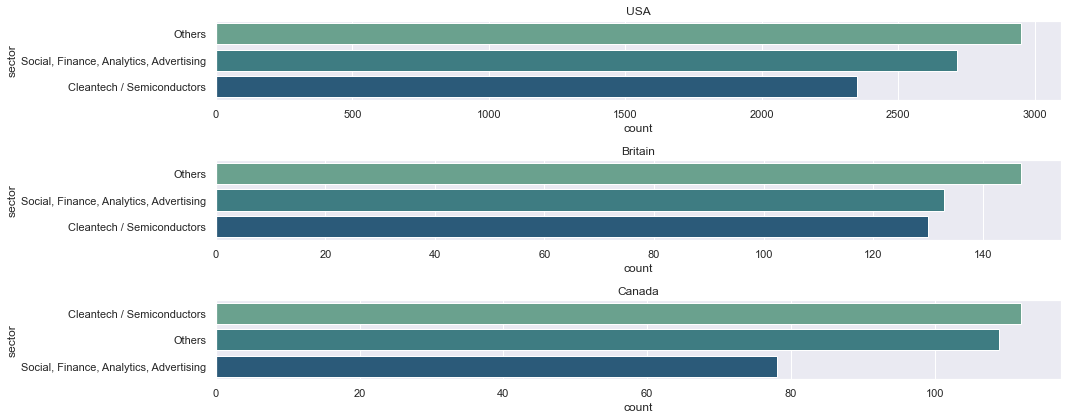

In [212]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)

sns.set(style='darkgrid')

sns.countplot(y="sector",  data=top_en_ven_cnt_with_sectors[top_en_ven_cnt_with_sectors["country_code"]=='USA'],
              palette="crest", order=top_en_ven_cnt_with_sectors.sector.value_counts().iloc[:3].index)
plt.title('USA')

plt.subplot(3,1,2)

sns.countplot(y="sector",  data=top_en_ven_cnt_with_sectors[top_en_ven_cnt_with_sectors["country_code"]=='GBR'],
              palette="crest", order=top_en_ven_cnt_with_sectors.sector.value_counts().iloc[:3].index)
plt.title('Britain')

plt.subplot(3,1,3)

sns.countplot(y="sector",  data=top_en_ven_cnt_with_sectors[top_en_ven_cnt_with_sectors["country_code"]=='CAN'],
              palette="crest", order = df.sector.value_counts().iloc[:3].index)
plt.title('Canada')
plt.tight_layout()



In [194]:

top_en_ven_cnt_with_sectors

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,sector
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
1,/organization/accelerated-vision-group,/funding-round/efc17c623b56a27ee73dca0f0155def3,venture,A,21-05-2012,"6,000,000",Accelerated Vision Group,http://acceleratedvision.com,Analytics,operating,USA,KS,Kansas City,Overland Park,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
2,/organization/accelops,/funding-round/c521b592ec7c69178447aa7242d90995,venture,A,01-10-2007,"7,000,000",Accelops,http://www.accelops.com,Analytics|Cloud Computing|Cloud Management|Net...,operating,USA,CA,SF Bay Area,Santa Clara,01-01-2007,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/adaptive-insights,/funding-round/63bca9b5f18393be1880bafb909c0767,venture,D,22-01-2008,"14,000,000",Adaptive Insights,http://www.adaptiveinsights.com/,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,CA,SF Bay Area,Palo Alto,01-04-2003,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/adaptive-insights,/funding-round/81a83b315bcf2e6e67592487249cbdb4,venture,C,01-03-2007,"7,500,000",Adaptive Insights,http://www.adaptiveinsights.com/,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,CA,SF Bay Area,Palo Alto,01-04-2003,analytics,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13101,/organization/waze,/funding-round/a9c915d6eaa834a8be2cd3ecc6defc71,venture,A,01-03-2008,"12,000,000",Waze,http://waze.com,Navigation|Transportation,acquired,USA,CA,SF Bay Area,Palo Alto,01-01-2007,navigation,"News, Search and Messaging"
13102,/organization/wishabi,/funding-round/b4252e94f10c55ff6ed566ef813f4d53,venture,B,05-09-2013,"15,000,000",Wishabi,http://www.wishabi.com,Comparison Shopping|Printing|Software,operating,CAN,ON,Toronto,Toronto,08-01-2008,comparison shopping,"News, Search and Messaging"
13103,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,A,03-08-2015,"8,000,000",Clevertap,https://clevertap.com/,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,CA,SF Bay Area,Palo Alto,24-05-2013,consumer behavior,"Social, Finance, Analytics, Advertising"
13104,/organization/yapta,/funding-round/2bef2981d0db9747630882cc91e42ba5,venture,NaN,20-07-2011,"5,000,000",Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,tracking,Others
